In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('A_Z Handwritten Data.csv')

In [46]:
df.shape

(372450, 785)

In [47]:
X = df.drop('0', axis=1)
y = df['0']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train_con = np.reshape(X_train.values, (X_train.shape[0], 28, 28, 1))
X_test_con = np.reshape(X_test.values, (X_test.shape[0], 28, 28, 1))

y_train_con = pd.get_dummies(y_train)
y_test_con = pd.get_dummies(y_test)

input_shape = (28, 28, 1)

In [50]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.datasets import mnist
from keras.utils import np_utils
import keras

In [51]:
# Creating the model
model = Sequential()

# CRP 1
model.add(Conv2D(20, (5, 5), padding = "same", input_shape = input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

#CRP 2
model.add(Conv2D(50, (5, 5), padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

# Fully connected layers (w/ RELU)
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

# Softmax (for classification)
model.add(Dense(y_train_con.shape[1]))
model.add(Activation("softmax"))
           
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_5 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)             

In [54]:
# fitting the data
batch_size = 128

model.fit(X_train_con, y_train_con,
         batch_size = batch_size,
         epochs = 10,
         validation_data = (X_test_con, y_test_con),
         shuffle = True)

Epoch 1/10
1950/1950 [==============================] - 182s 93ms/step - loss: 9.9524 - accuracy: 0.4273 - val_loss: 2.9586 - val_accuracy: 0.6404
Epoch 2/10
1950/1950 [==============================] - 139s 71ms/step - loss: 2.1693 - accuracy: 0.7112 - val_loss: 1.6506 - val_accuracy: 0.7574
Epoch 3/10
1950/1950 [==============================] - 146s 75ms/step - loss: 1.3955 - accuracy: 0.7868 - val_loss: 1.1929 - val_accuracy: 0.8086
Epoch 4/10
1950/1950 [==============================] - 145s 75ms/step - loss: 1.0669 - accuracy: 0.8256 - val_loss: 0.9580 - val_accuracy: 0.8375
Epoch 5/10
1950/1950 [==============================] - 147s 75ms/step - loss: 0.8791 - accuracy: 0.8494 - val_loss: 0.8137 - val_accuracy: 0.8574
Epoch 6/10
1950/1950 [==============================] - 147s 75ms/step - loss: 0.7542 - accuracy: 0.8669 - val_loss: 0.7089 - val_accuracy: 0.8719
Epoch 7/10
1950/1950 [==============================] - 148s 76ms/step - loss: 0.6640 - accuracy: 0.8799 - val_loss: 0

In [55]:
model.save('az-lenet.h5')

In [89]:
sample = X_test.iloc[25]

In [90]:
sample.shape

(784,)

In [91]:
sample = np.reshape(sample.values, (1, 28, 28, 1))

In [92]:
pred = model.predict(sample)

In [93]:
pred[0]

array([4.68606049e-16, 9.60291331e-08, 9.07785641e-19, 9.14742827e-01,
       1.69994973e-11, 3.21143834e-14, 7.31555556e-18, 3.34992552e-14,
       8.52542594e-02, 2.48973144e-08, 8.47118974e-17, 4.48769624e-12,
       6.59809429e-11, 9.85068450e-12, 7.35371399e-12, 4.55647097e-07,
       3.73902853e-11, 1.00012595e-13, 1.67853453e-10, 7.13272323e-13,
       5.52952358e-14, 4.19060515e-11, 1.60007034e-12, 4.12568688e-13,
       1.21986785e-08, 2.36161168e-06], dtype=float32)

In [75]:
def output(pred):
    max_ = 0
    index = 0
    for i in range(len(pred[0])):
        if pred[0][i] > max_:
            max_ = pred[0][i]
            index = i
            
    if index == 0:
        return 'A'
    elif index == 1:
        return 'B'
    elif index == 2:
        return 'C'
    elif index == 3:
        return 'D'
    elif index == 4:
        return 'E'
    elif index == 5:
        return 'F'
    elif index == 6:
        return 'G'
    elif index == 7:
        return 'H'
    elif index == 8:
        return 'I'
    elif index == 9:
        return 'J'
    elif index == 10:
        return 'K'
    elif index == 11:
        return 'L'
    elif index == 12:
        return 'M'
    elif index == 13:
        return 'N'
    elif index == 14:
        return 'O'
    elif index == 15:
        return 'P'
    elif index == 16:
        return 'Q'
    elif index == 17:
        return 'R'
    elif index == 18:
        return 'S'
    elif index == 19:
        return 'T'
    elif index == 20:
        return 'U'
    elif index == 21:
        return 'V'
    elif index == 22:
        return 'W'
    elif index == 23:
        return 'X'
    elif index == 24:
        return 'Y'
    else:
        return 'Z'

In [94]:
output(pred)

'D'

In [85]:
sample_img = X_test.iloc[25]

In [86]:
sample_img.shape

(784,)

In [87]:
sample_img = np.reshape(sample_img.values, (28, 28, 1))

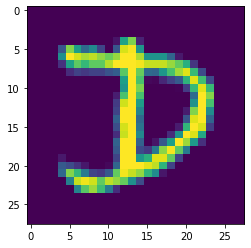

In [88]:
plt.imshow(sample_img)